In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import explainer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
np.set_printoptions(formatter={'float': lambda x: "{:.4f}".format(x)})
pd.options.display.float_format = "{:.3f}".format
sns.set(style='darkgrid', context='talk', palette='rainbow')
# Import sample data

diabetes = load_diabetes(as_frame=True)
X = diabetes['data'].iloc[:, :4]  # Select first 4 columns
y = diabetes['target']
# Partition data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)
print(f"Training features shape: {X_train.shape}")
print(f"Training target shape: {y_train.shape}\n")
print(f"Test features shape: {X_test.shape}")
print(f"Test target shape: {y_test.shape}")
display(X_train.head())
# Train a simple model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

Training features shape: (353, 4)
Training target shape: (353,)

Test features shape: (89, 4)
Test target shape: (89,)


,age,sex,bmi,bp
438,-0.006,0.051,-0.016,-0.068
232,0.013,0.051,0.000,-0.011
80,0.071,-0.045,0.012,0.043
46,-0.056,-0.045,-0.012,-0.033
381,-0.071,0.051,-0.089,-0.075


RandomForestRegressor(random_state=42)

In [3]:

#orginal way
#explainer = shap.Explainer(model)
#shap_test = explainer(X_test)

explainer = explainer.Explainer(model)
shap_test = explainer.explain(X_test)
print(f"Shap values length: {len(shap_test)}\n")
print(f"Sample shap value:\n{shap_test[0]}")

TypeError: object of type 'NoneType' has no len()

In [ ]:
print(f"Expected value: {explainer.expected_value[0]:.1f}")
print(f"Average target value (training data): {y_train.mean():.1f}")
print(f"Base value: {np.unique(shap_test.base_values)[0]:.1f}")


Expected value: 153.4
Average target value (training data): 153.4
Base value: 153.4


In [ ]:
(shap_test.data == X_test).describe()


,age,sex,bmi,bp
count,89,89,89,89
unique,1,1,1,1
top,True,True,True,True
freq,89,89,89,89


In [ ]:
pd.DataFrame(shap_test.data, columns=shap_test.feature_names,
             index=X_test.index)


,age,sex,bmi,bp
246,0.042,-0.045,-0.032,-0.062
425,-0.078,-0.045,-0.041,-0.081
293,-0.071,-0.045,0.093,0.013
31,-0.024,-0.045,-0.065,-0.081
359,0.038,0.051,0.006,0.032
...,...,...,...,...
277,-0.035,-0.045,-0.059,0.001
132,0.016,0.051,-0.021,-0.009
213,0.002,-0.045,-0.071,-0.023
286,-0.038,-0.045,-0.055,-0.078


In [ ]:
shap_df = pd.DataFrame(shap_test.values,
                       columns=shap_test.feature_names,
                       index=X_test.index)
shap_df


,age,sex,bmi,bp
246,-1.753,2.081,-24.650,-25.634
425,5.925,3.863,-33.091,-12.753
293,-14.266,-0.535,75.543,-11.028
31,-8.554,2.101,-39.069,-23.174
359,9.539,0.213,-7.332,8.434
...,...,...,...,...
277,-10.023,3.528,-45.031,-8.440
132,-4.953,-5.497,-35.544,2.948
213,-6.329,2.796,-53.651,-11.681
286,-4.718,2.903,-45.648,-21.633


In [ ]:
np.isclose(model.predict(X_test),
           explainer.expected_value[0] + shap_df.sum(axis=1))


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

Text(0.5, 1.0, 'Distribution of shap values')

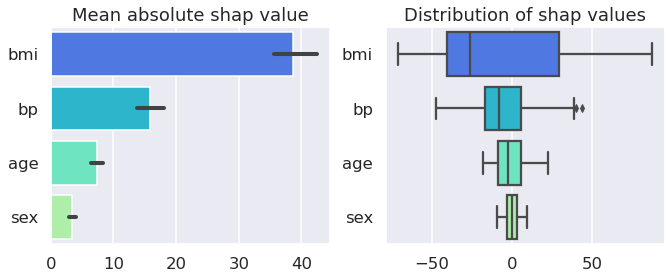

In [ ]:
columns = shap_df.apply(np.abs).mean()\
                 .sort_values(ascending=False).index
fig, ax = plt.subplots(1, 2, figsize=(11, 4))
sns.barplot(data=shap_df[columns].apply(np.abs), orient='h',
            ax=ax[0])
ax[0].set_title("Mean absolute shap value")
sns.boxplot(data=shap_df[columns], orient='h', ax=ax[1])
ax[1].set_title("Distribution of shap values")
